### 📚 머신러닝 해석이란?
**무언가를 해석한다는 것**은 **그 의미를 설명하는 것**이다.<br>
머신러닝에서 그 무엇은 알고리즘을 의미하고, 가장 기본적인 모델인 단순 선형회귀(Simple Linear Regression)에 대해서 살펴보자.

$$\hat y = \beta_0+\beta_1x_1$$

데이터에 적합된 이 모델의 의미는 예측값에 대해서 x의 피처와 계수의 가중합이라는 것이다.<br>
나이가 18세인 사람들의 몸무게와 키에 대해서 선형회귀 모델을 적합시켜보자

$$weight=\beta_0+\beta_1height$$

In [29]:
import math
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [30]:
url='https://wiki.socr.umich.edu/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tbl = soup.find('table', {'class':'wikitable'})
height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)', 'Weight(Pounds)']]

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_31960/1630685747.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)', 'Weight(Pounds)']]


In [34]:
height_weight_df

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


In [39]:
x = height_weight_df['Height(Inches)'].values.reshape(200, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(200, 1)

In [40]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [44]:
print('가중치 : ', model.coef_[0][0])
print('편향 : ', model.intercept_[0])

가중치 :  3.4326761292716284
편향 :  -106.02770644878129


### 선형회귀 모델의 공식
$$\hat y = -106.02+3.43x$$

In [48]:
# 평균절대오차가 7.8이라는 것은 평균적으로 예측이 실제값에서 7.8파운드 정도 차이가 남을 의미하지만, 직관적이지 않고 유익한 정보가 아닐 수 있다.
y_pred = model.predict(x)
mae = mean_absolute_error(y_pred, y)
print(mae)

7.7587373803882205


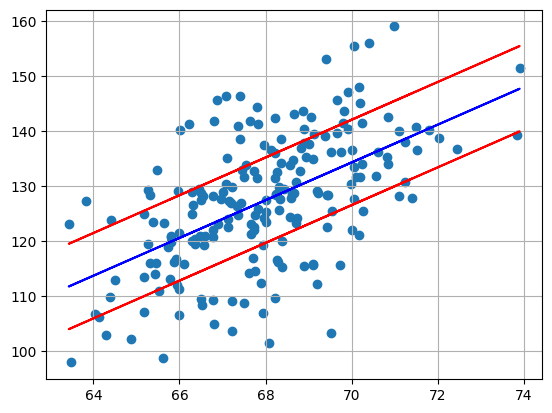

In [56]:
# 그림에서 보면 20파운드~25파운드 정도 떨어져있는 경우가 많다.
# 하지만 mae의 값이 8에 가깝다고 속일 수 있다. 이럴때, 오차를 시각화하는 과정은 필수다.
# 따라서 아래 분포는 등분산을 이룬다고 할 수 있다.
plt.scatter(x, y)
plt.plot(x, y_pred, c='blue')
plt.plot(x, y_pred-mae, c='red')
plt.plot(x, y_pred+mae, c='red')
plt.grid()

In [62]:
# 이 모델을 이용해서 키와 몸무게 사이의 선형 관계를 수립하려고 할때, 이 관계를 선형 상관이라고 한다.
# 이 관계의 강도를 측정하는 방법은 Pearson's correlation coefficient를 사용하는 것이다.
corr, pval = pearsonr(x.ravel(), y.ravel())
print(corr)

0.5568647346122991


In [64]:
# 숫자가 양수이고 키가 증가살수록 몸무게도 증가하는 경향이 있으므로 상관관계가 있을 것이다.
# 유의 수준(p_value)의 값이 5미만이라면 이 상관관계에 대해서 충분한 근거가 있다고 말할 수 있다.
print(pval<0.5)

True
